# **Class Work**
## Samsung Innovation Campus
### Artificial Intelligece Module:  Classification Models

**Nombre:** Alan Palma

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer


plt.style.use(['science'])

In [39]:
# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

df = pd.DataFrame(X)
df['diagnostic'] = y

# Names of features
feature_names = data.feature_names.tolist()
# Target names
target_names = data.target_names.tolist()   

print("Feature names: ", feature_names)
print("Target names", target_names)


Feature names:  ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Target names ['malignant', 'benign']


In [40]:
# Look for null values
print("Null values in features:\n", np.unique(X.isnull().sum()))
print("Null values in target:\n", np.unique(y.isnull().sum()))

Null values in features:
 [0]
Null values in target:
 [0]


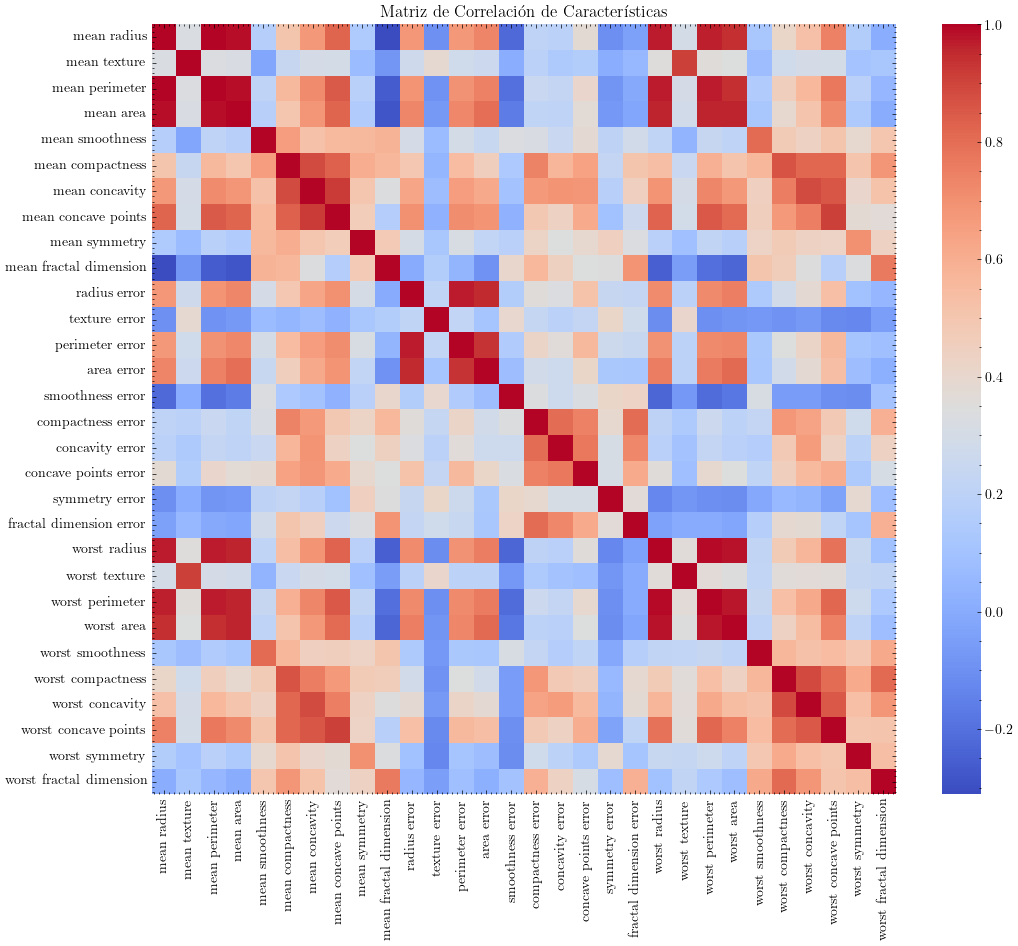

In [24]:
# Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Matriz de Correlación de Características")
plt.show()

<Figure size 600x500 with 0 Axes>

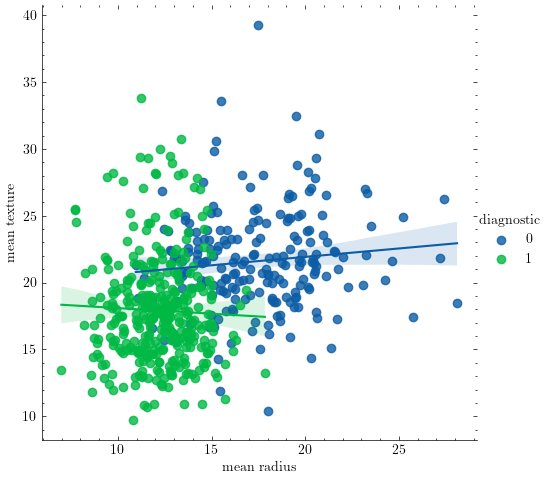

In [ ]:
plt.figure(figsize=(6, 5))
sns.lmplot(x='mean radius', y = 'mean texture', hue = 'diagnostic', data=df)
plt.show()

In [22]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print("Train set size:", x_train.shape)
print("Test set size:", x_test.shape)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Train set size: (455, 30)
Test set size: (114, 30)


In [ ]:
def eval_model(modelo, x_tr, x_ts, y_ts):
    modelo.fit(x_tr, y_train)
    pred = modelo.predict(x_ts)
    return accuracy_score(y_ts, pred)

results = {}

nb_model = GaussianNB()
results['Naibves Bayes'] = eval_model(nb_model, x_train_scaled, x_test_scaled, y_test)

knn_model = KNeighborsClassifier(n_neighbors = 1)
results['KNN'] = eval_model(nb_model, x_train_scaled, x_test_scaled, y_test)

nb_model = LogisticRegression(solver='liblinear', random_state=SEED)
results['Logistic Regresion'] = eval_model(nb_model, x_train_scaled, x_test_scaled, y_test)

tree_model = DecisionTreeClassifier(random_state=SEED)
results["Desicion Tree"] = eval_model(tree_model, x_train_scaled, x_test_scaled, y_test)


df_results = pd.DataFrame(list(results.items()), columns =['Modelo', 'Precisión'])
df_results = df_results.sort_values(by='Precision')

print(df_results.set_index("Modelo"))

                    Precision
Modelo                       
Desicion Tree        0.947368
Naibves Bayes        0.964912
KNN                  0.964912
Logistic Regresion   0.973684


Acorde con este resultado, la regresión logistica presenta mejor precisión.

In [ ]:
# Use logistic regression for final evaluation
final_model = LogisticRegression(solver='liblinear', random_state=SEED)
final_model.fit(x_train_scaled, y_train)

# Model prediction
y_pred = final_model.predict(x_test_scaled)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Métricas del modelo:")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R^2: {r2}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

Métricas del modelo:
Error cuadrático medio (MSE): 0.02631578947368421
R^2: 0.8879790370127744
Raíz del error cuadrático medio (RMSE): 0.16222142113076254


In [13]:
print("Reporte de clasificación:")
rep_class = classification_report(y_test, y_pred)
print(rep_class)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[41  2]
 [ 1 70]]


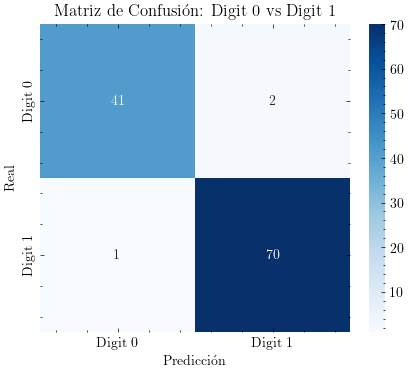

In [21]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Digit 0", "Digit 1"],
            yticklabels=["Digit 0", "Digit 1"])
plt.title("Matriz de Confusión: Digit 0 vs Digit 1")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [28]:
# Model Score
print("Nota del modelo: ", final_model.score(x_test_scaled, y_test))

Nota del modelo:  0.9736842105263158
